In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n = 10000
tempo_final = 1
Δt = tempo_final/n
L = 1
D = 1 # coeficiente de difusão
Δx = np.sqrt(2*D*Δt)
α = Δt/Δx**2
xx = np.arange(0,L,Δx) # acho que isso não é necessário x = L/Δx
tt = np.arange(0,tempo_final,Δt) # acho que isso não é necessário t = T/Δt


In [4]:
#condição inicial u(x,0) = f(x)

u = np.zeros((len(tt),len(xx)))
f = lambda x: 0

for x in range(len(xx)):
    u[0,x] = f(x+1)
u


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
# condição de contorno u(0,t) = a(t) e u(L,t) = b(t)
a = lambda t: 1000*np.exp(-t/100)
b = lambda t: 0

# Calcular a edp
for t in range(len(tt)-1) :
    for x in range(len(xx)-1):
        if x == 0:
            termo_anterior = a(t)
            termo_posterior = u[t,x+1]
        elif x + 1 == L:
            termo_anterior = u[t,x-1]
            termo_posterior = b(t)
        else:
            termo_anterior = u[t,x-1]
            termo_posterior = u[t,x+1]
        
        u[t+1,x] = α*(termo_posterior + termo_anterior) + u[t,x]*(1-2*α)
u

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.95024917e+02, 2.50000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.72890371e-04, 3.42340167e-04, 5.17318013e-04, ...,
        3.45442302e-04, 1.71337784e-04, 0.00000000e+00],
       [1.71170083e-04, 3.45104192e-04, 5.12170612e-04, ...,
        3.42005093e-04, 1.72721151e-04, 0.00000000e+00],
       [1.72552096e-04, 3.41670348e-04, 5.16305834e-04, ...,
        3.44766413e-04, 1.71002547e-04, 0.00000000e+00]])

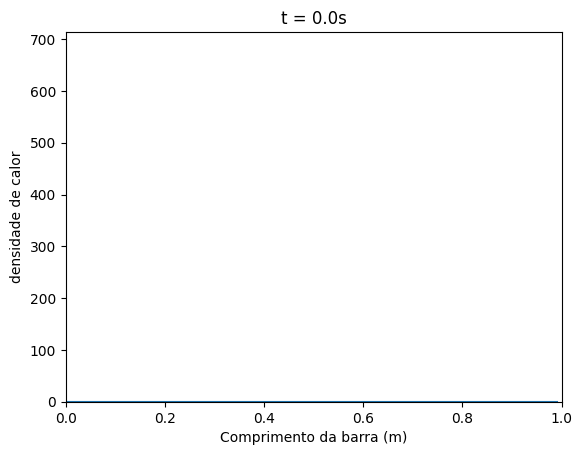

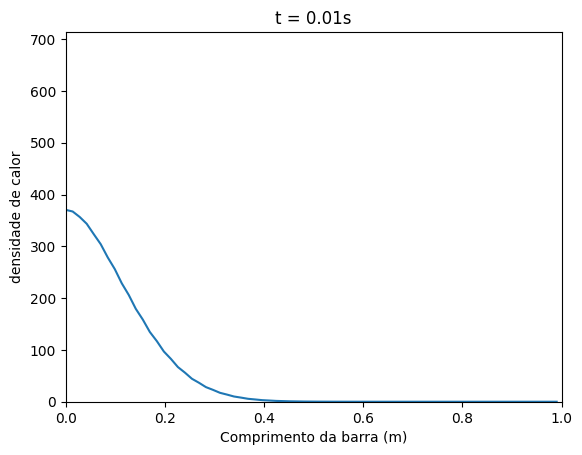

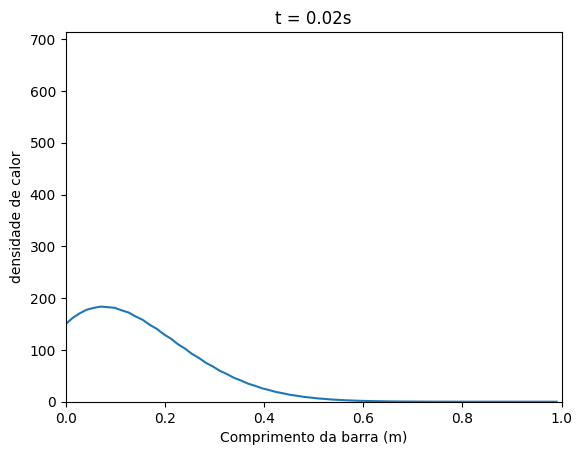

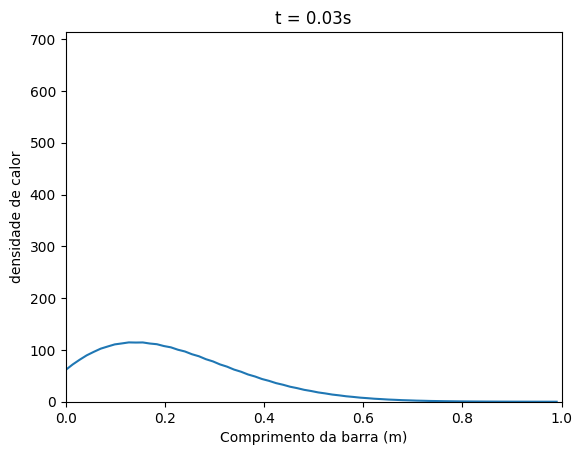

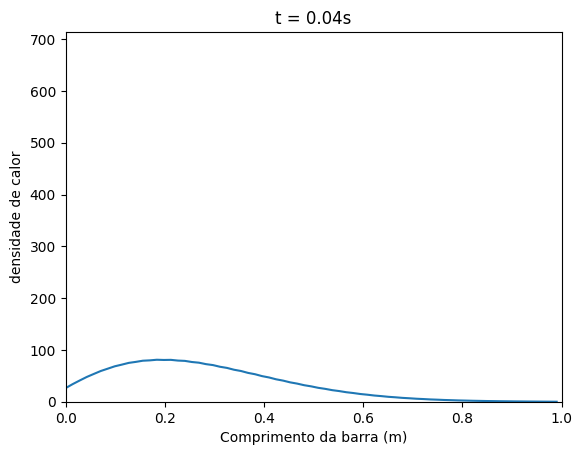

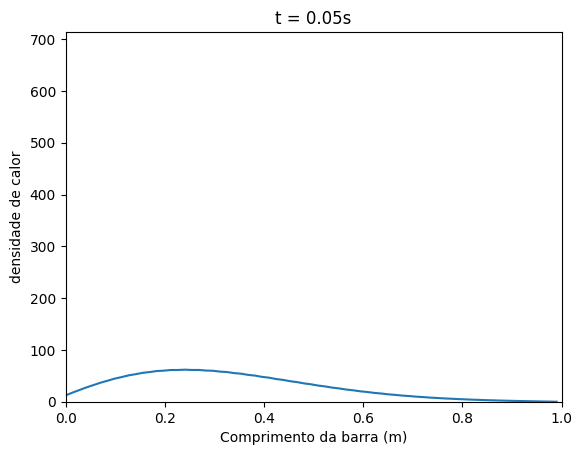

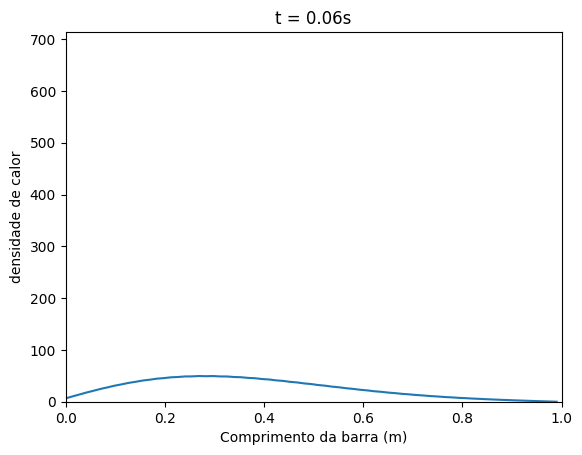

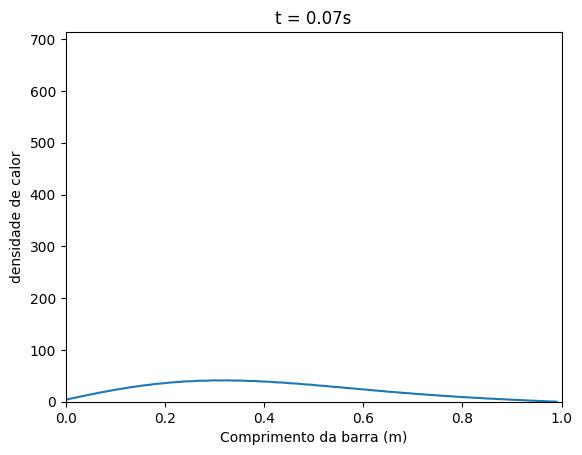

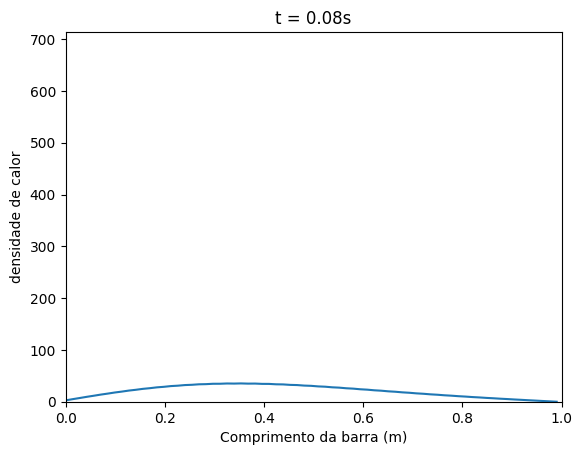

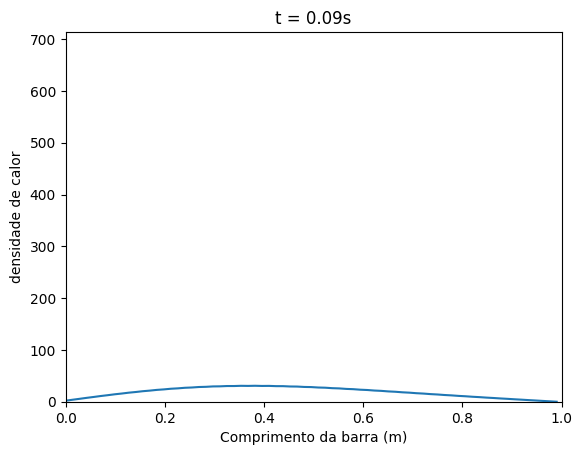

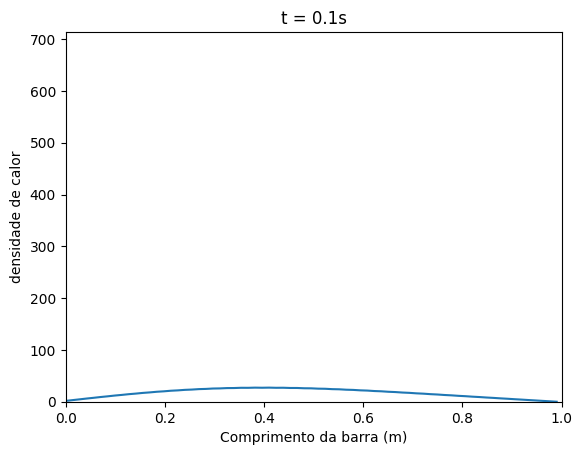

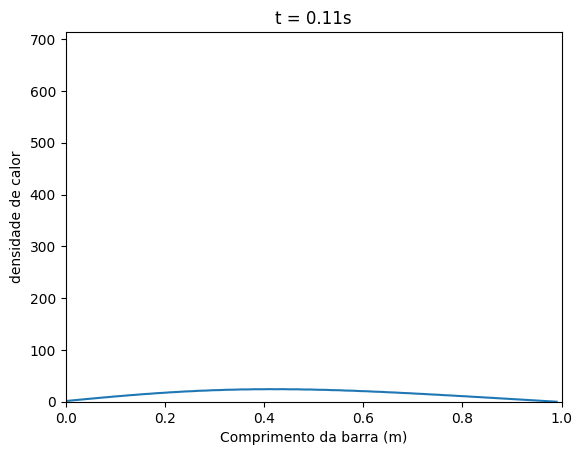

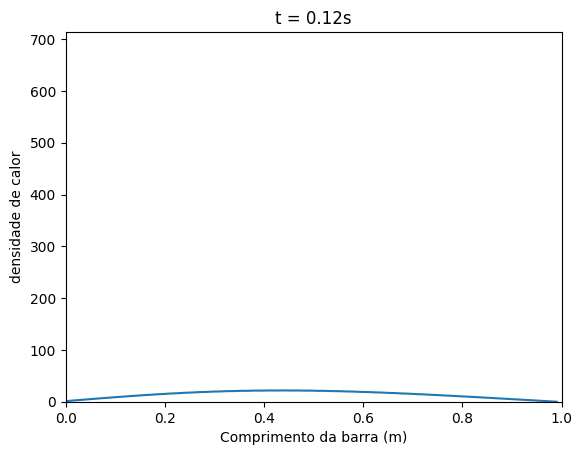

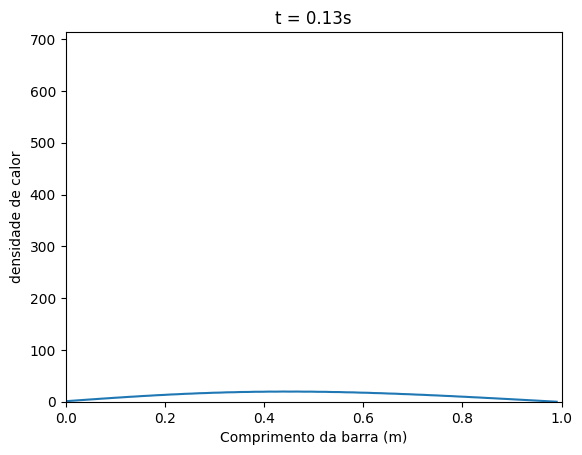

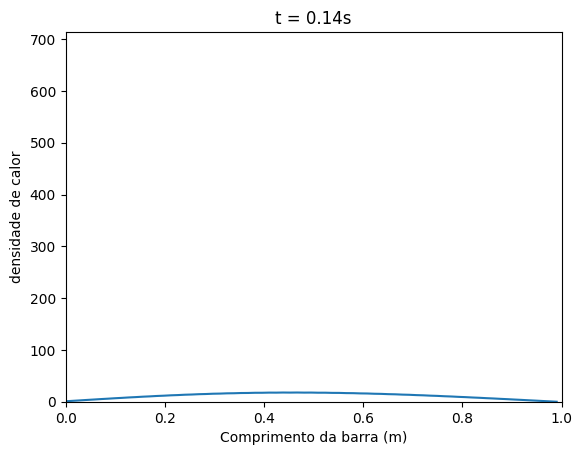

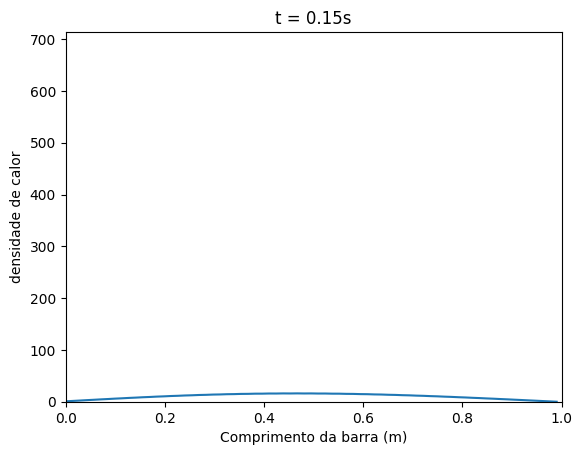

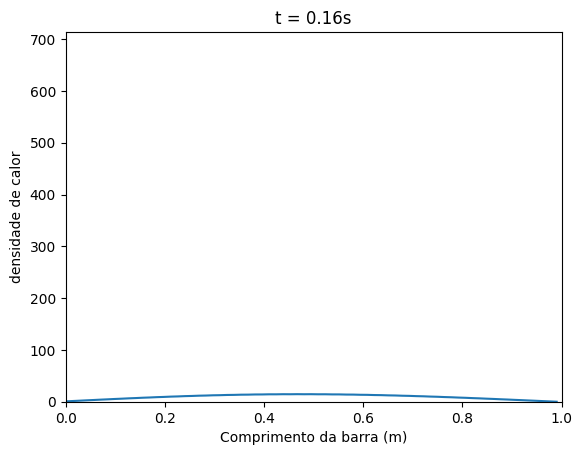

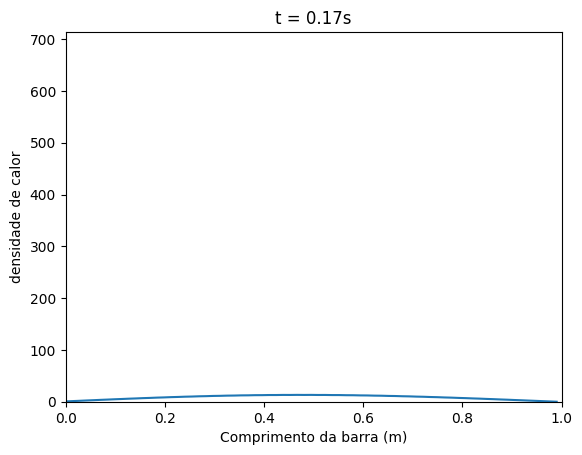

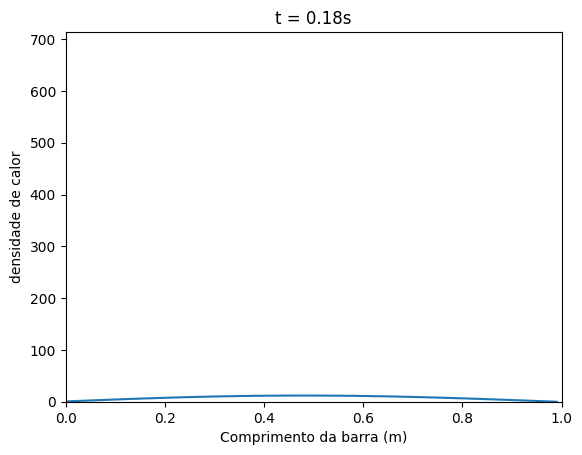

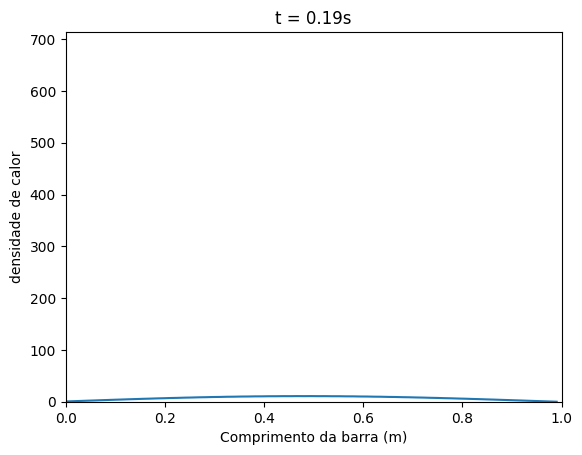

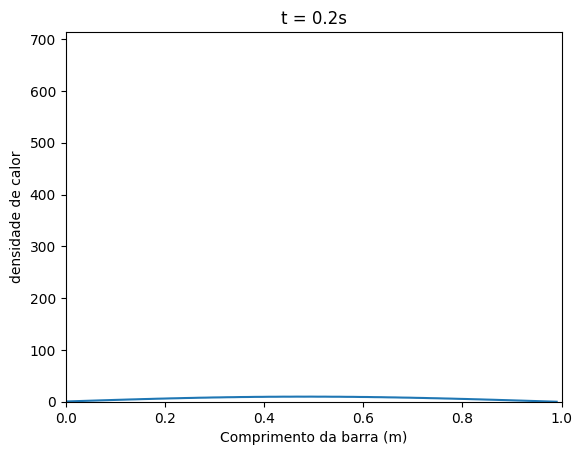

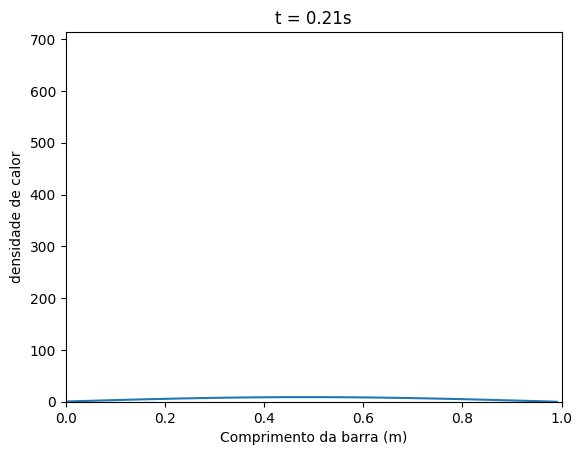

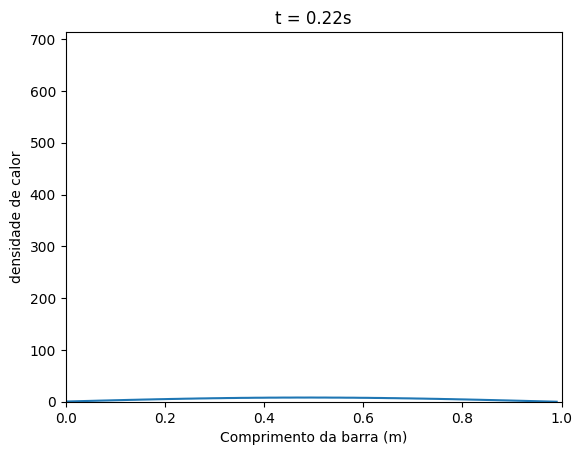

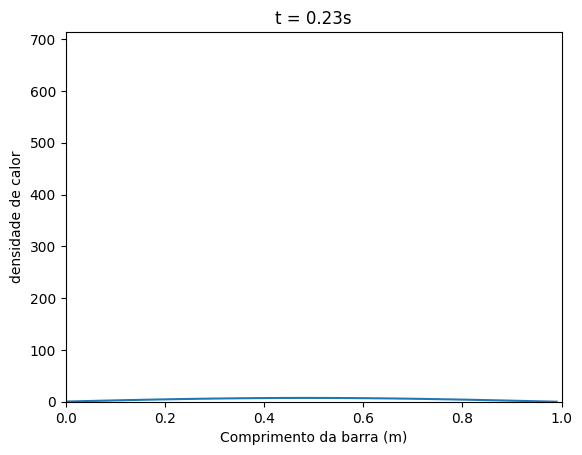

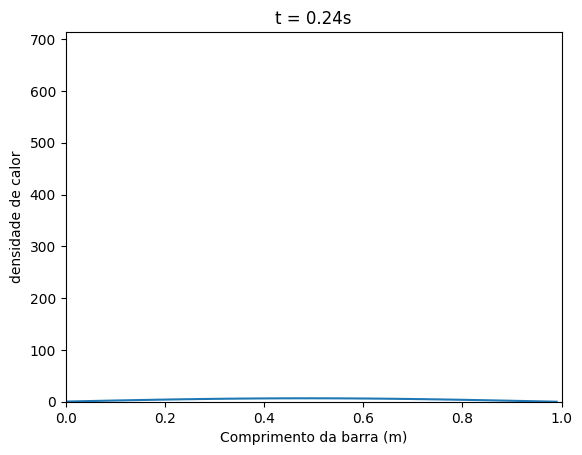

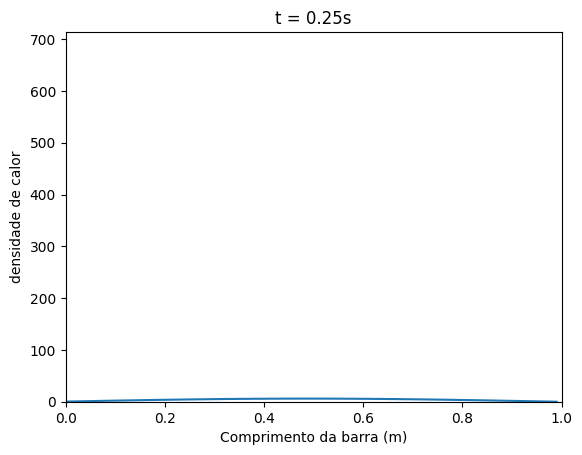

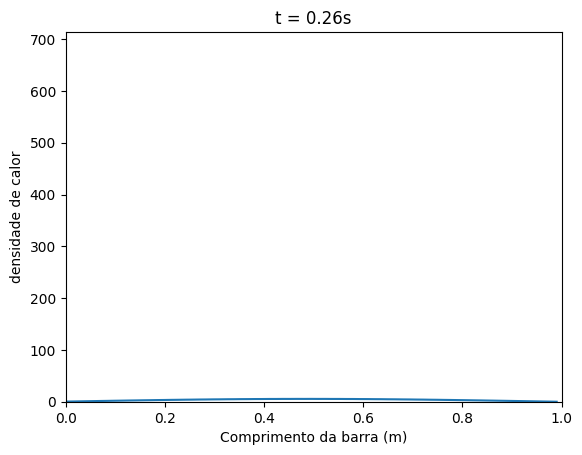

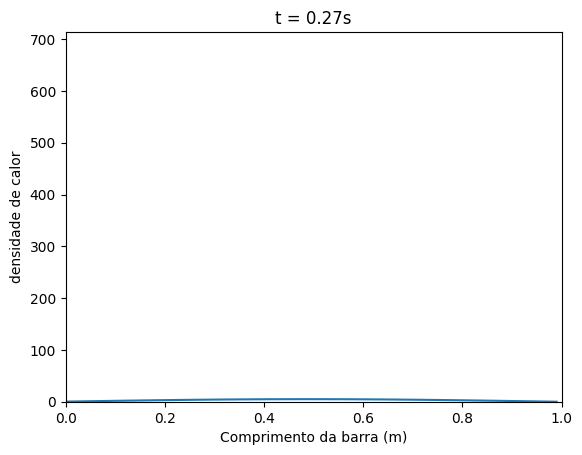

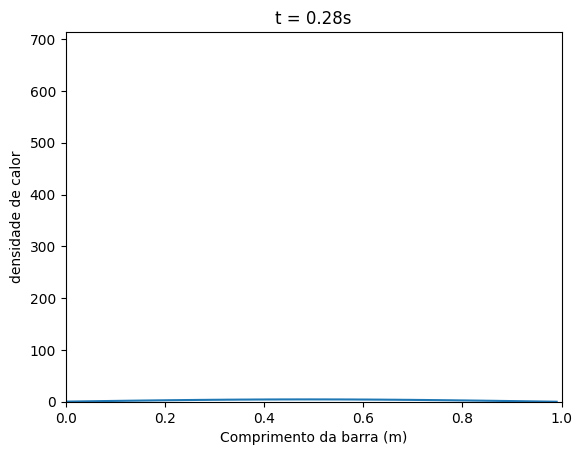

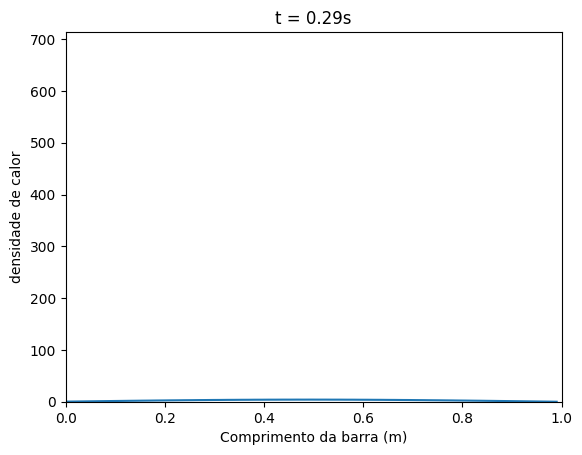

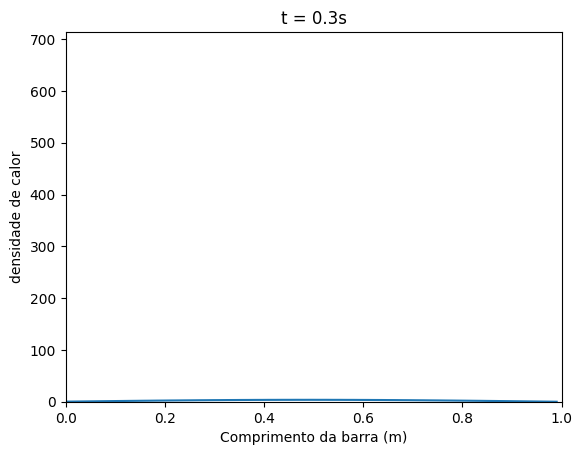

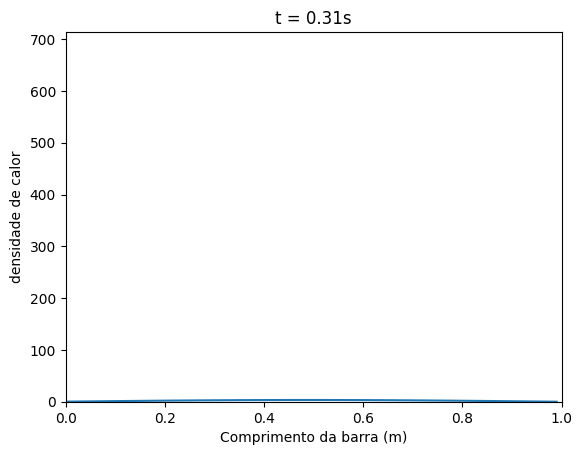

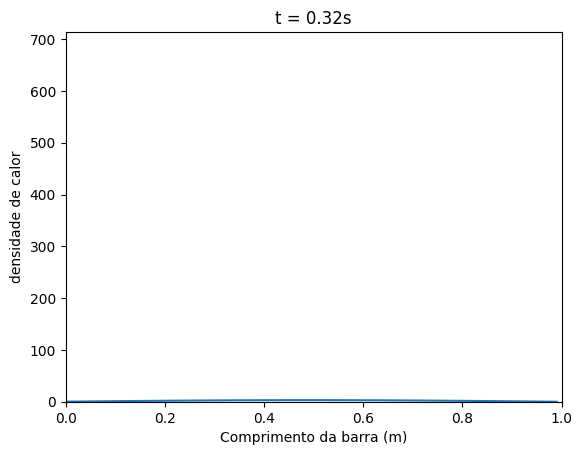

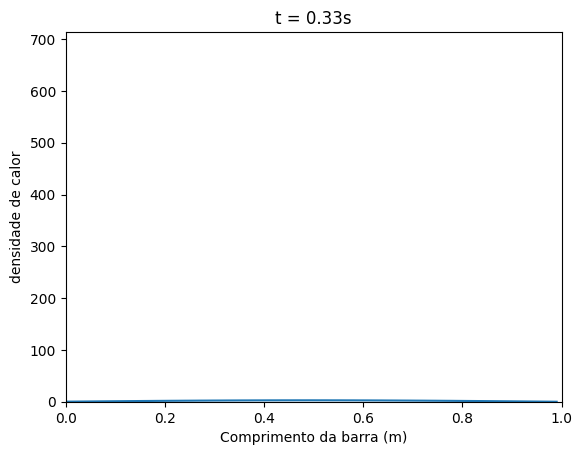

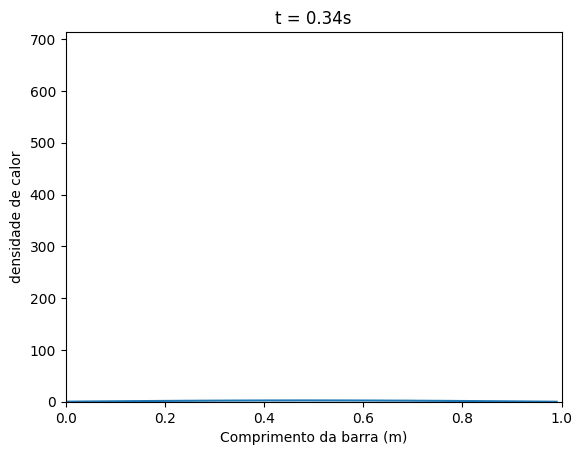

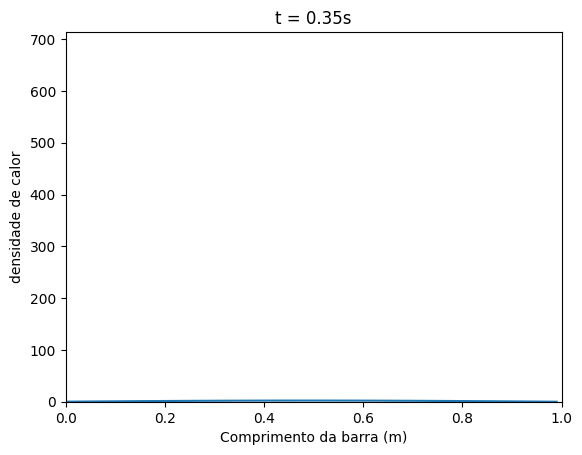

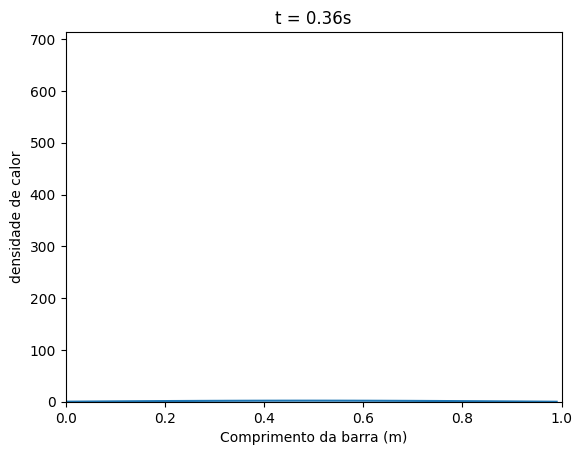

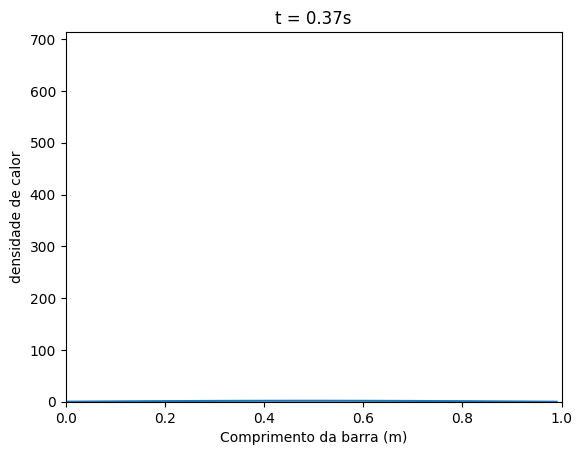

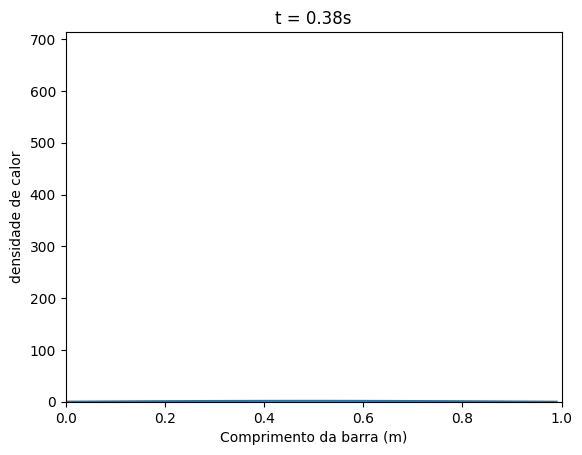

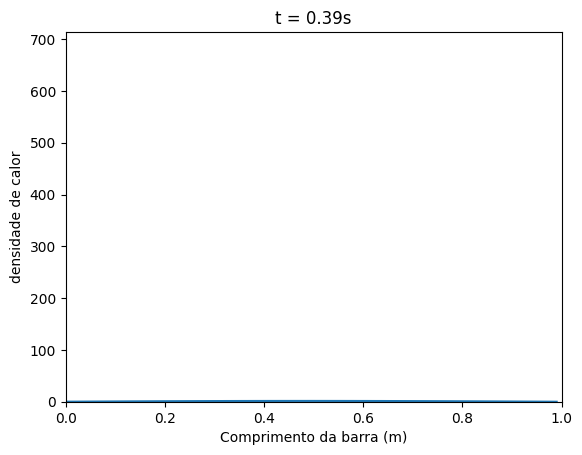

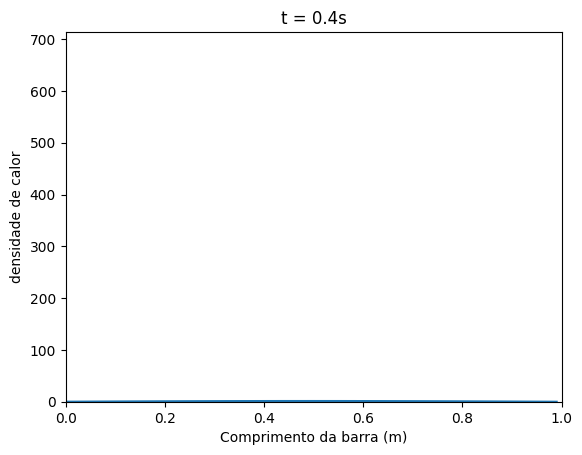

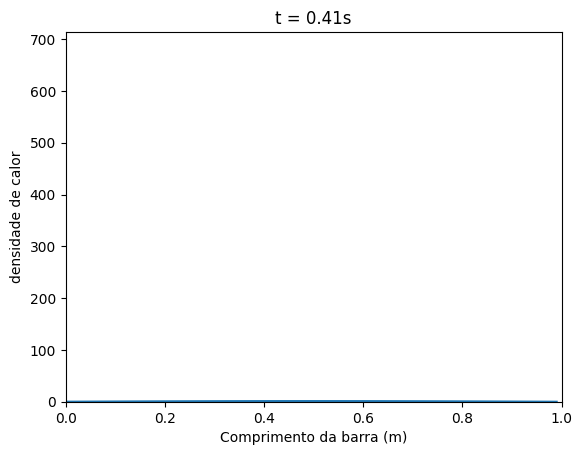

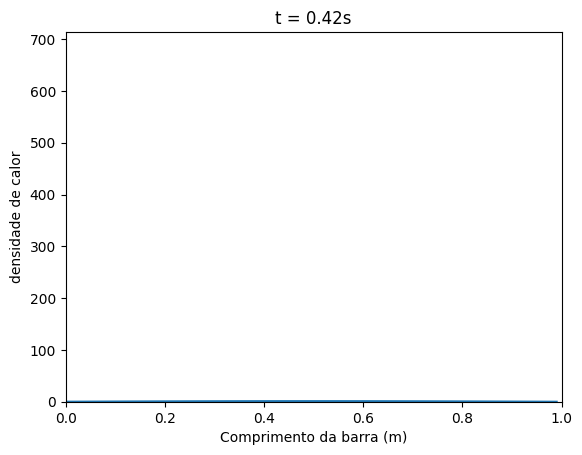

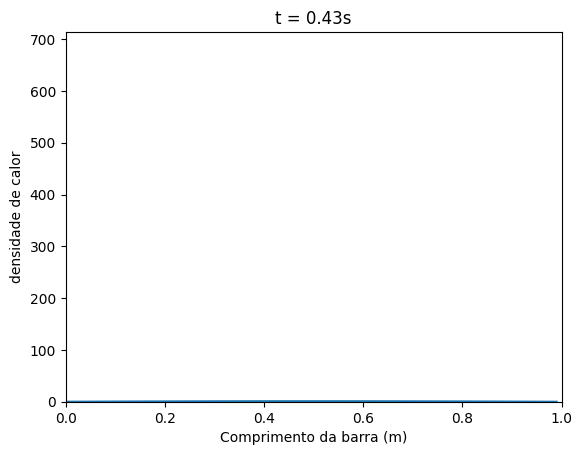

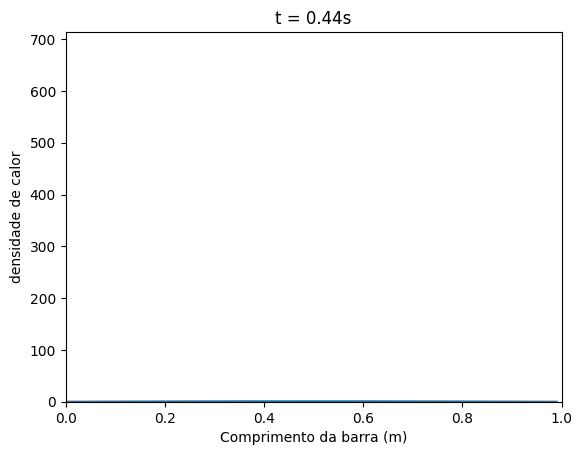

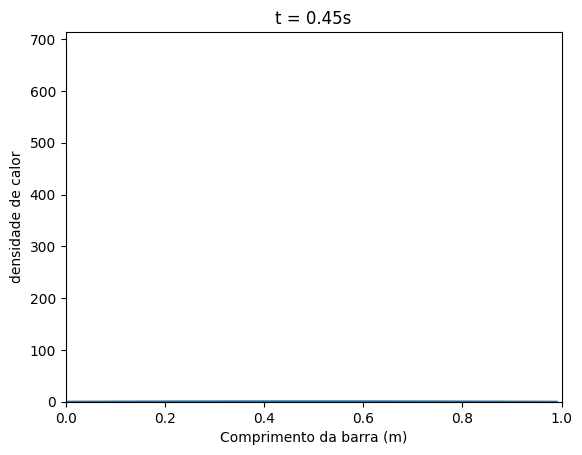

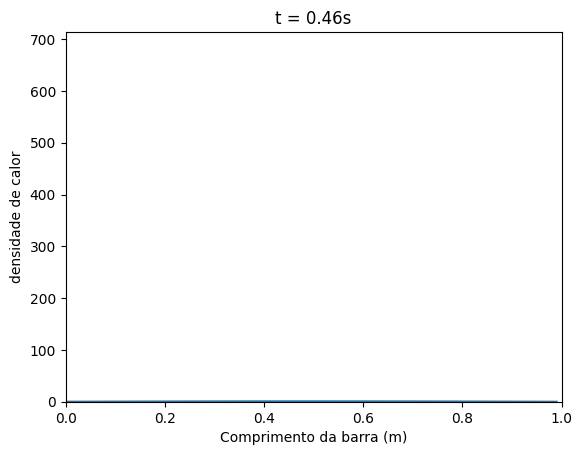

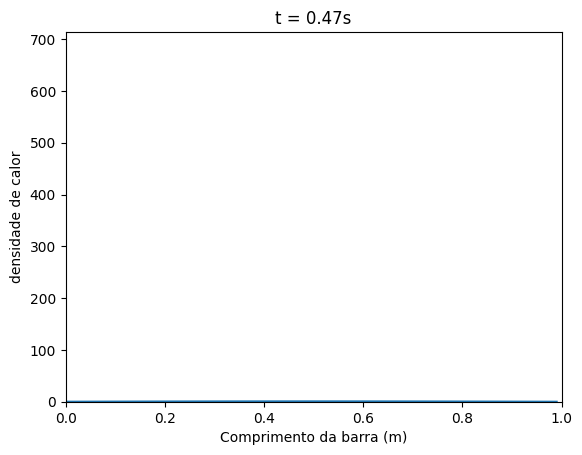

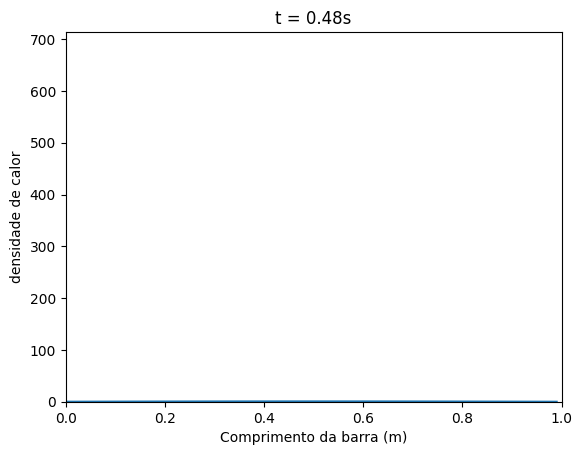

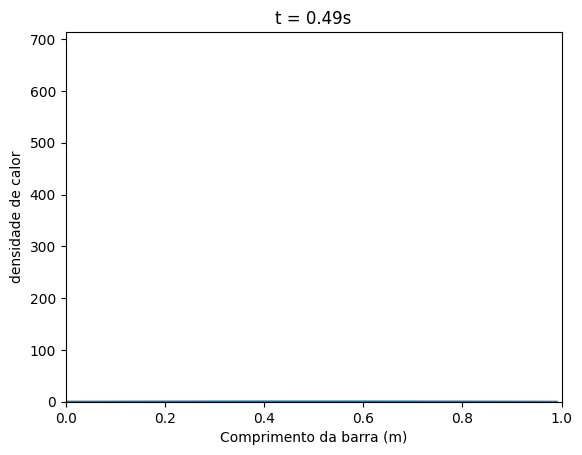

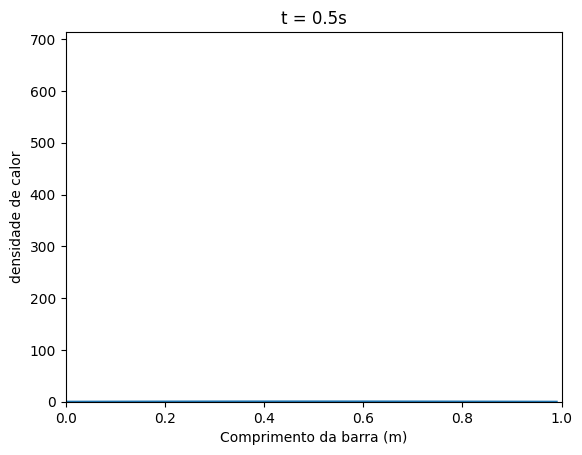

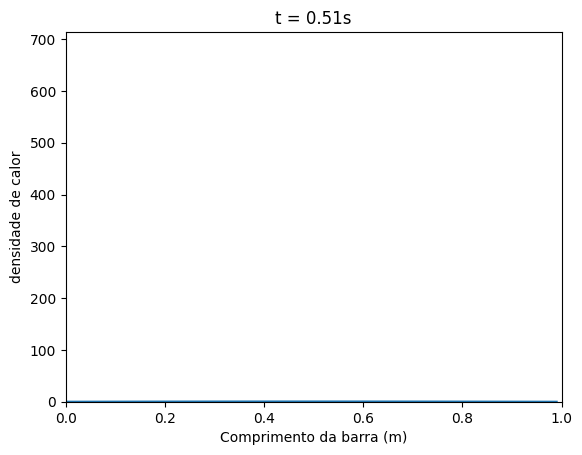

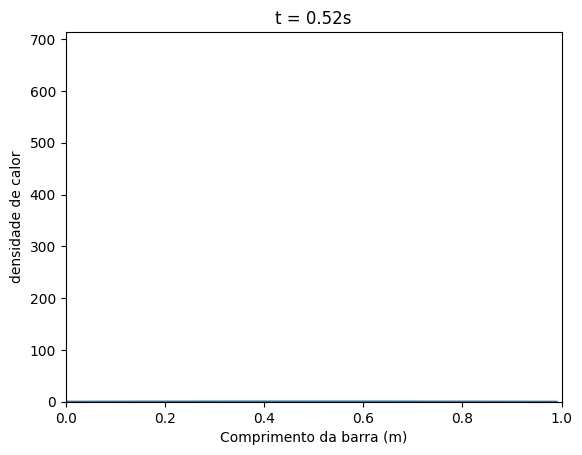

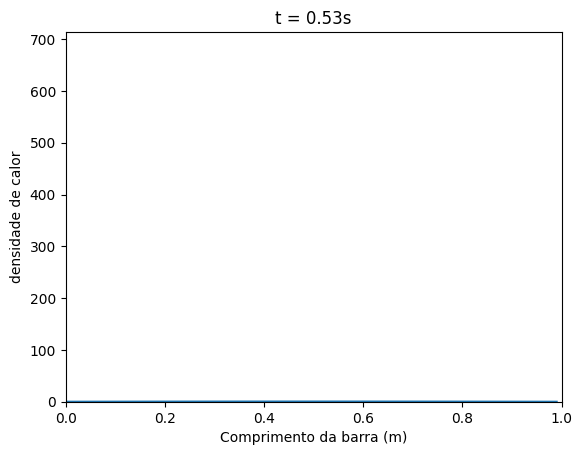

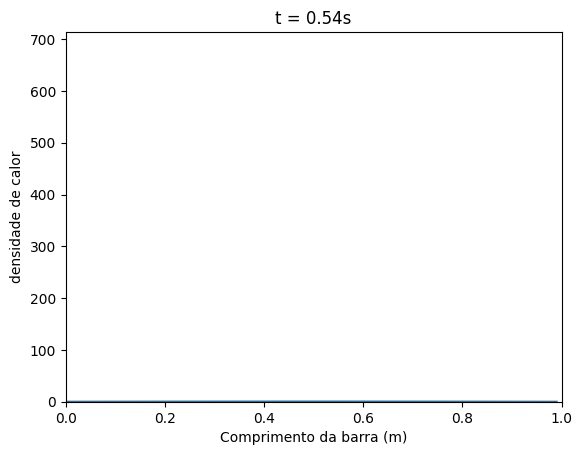

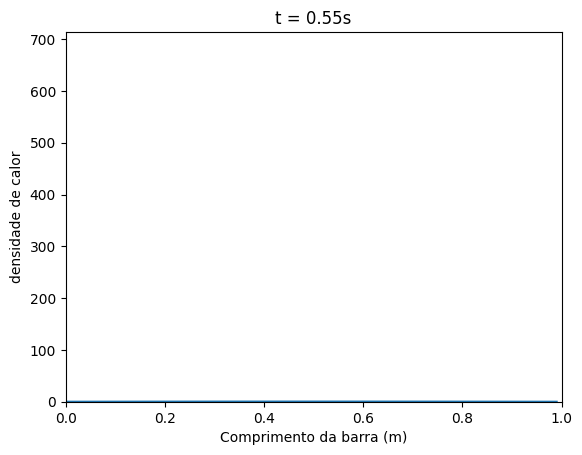

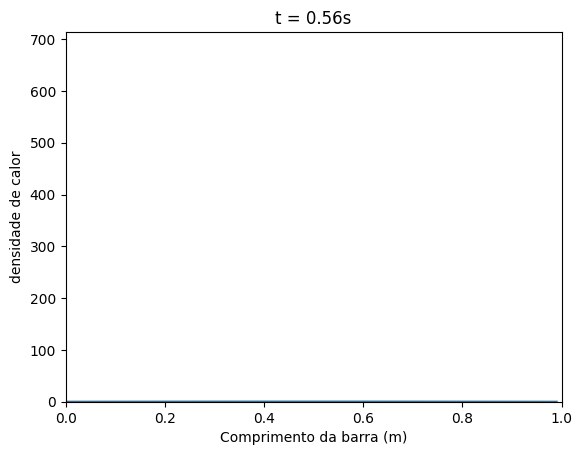

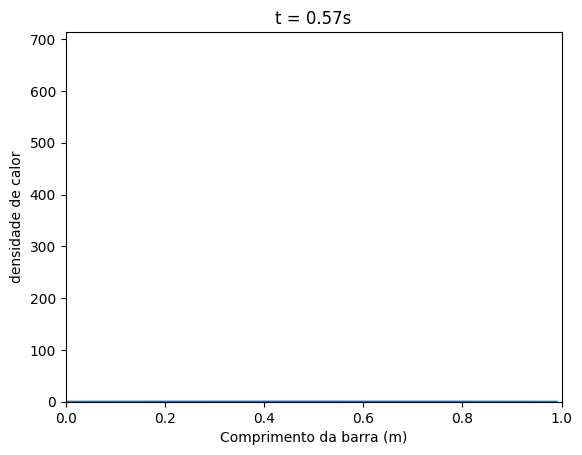

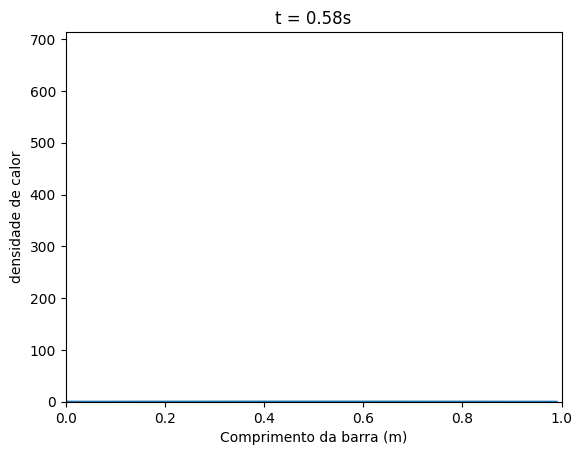

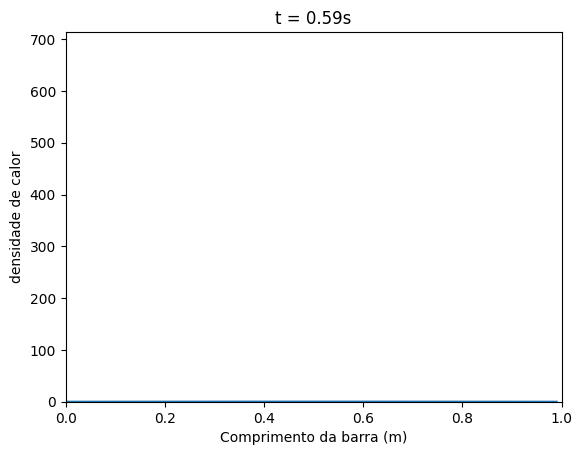

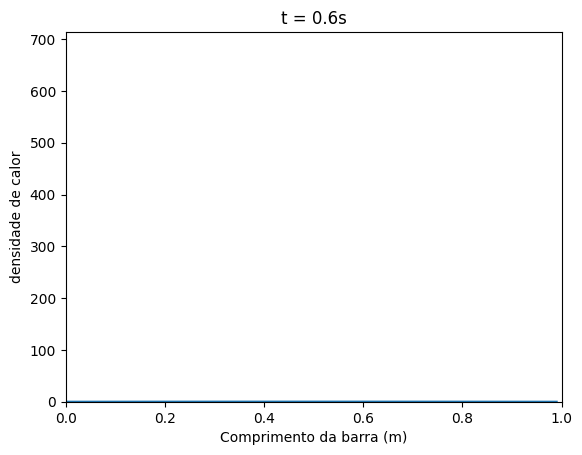

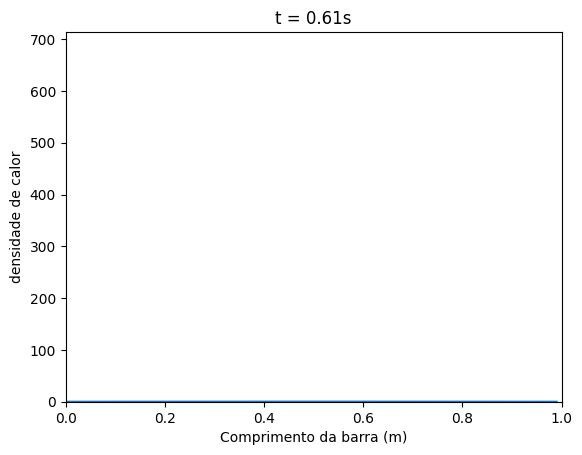

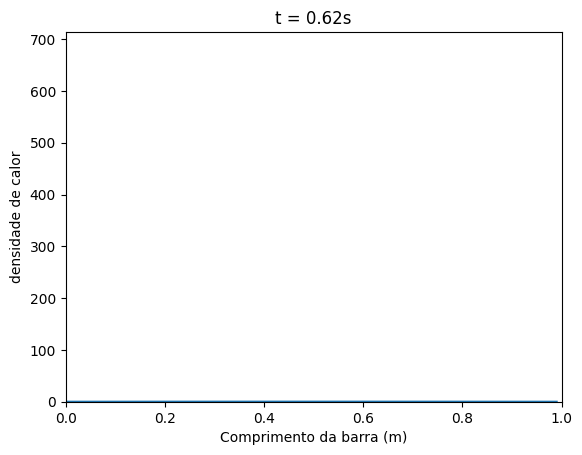

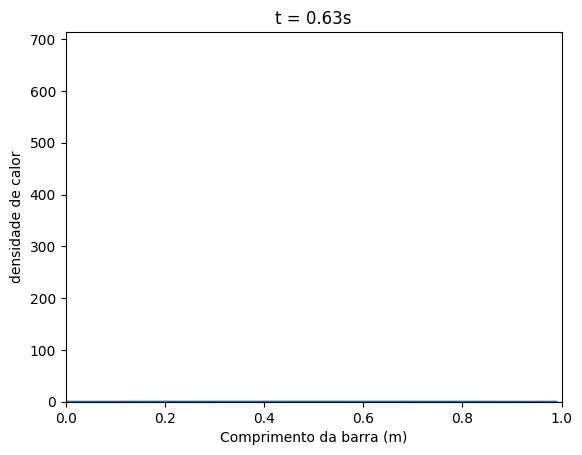

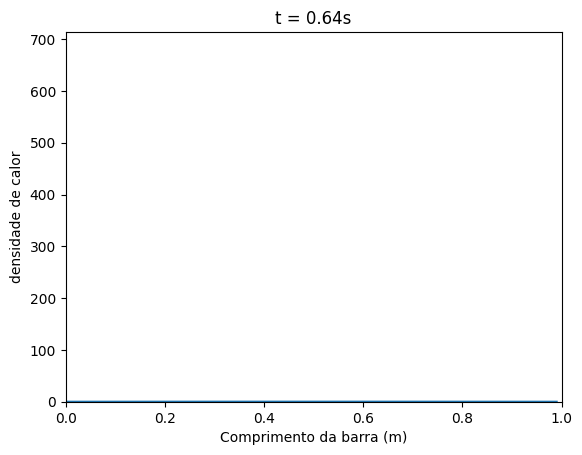

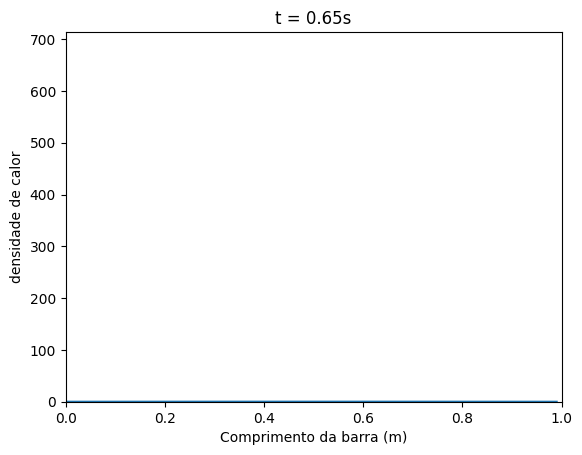

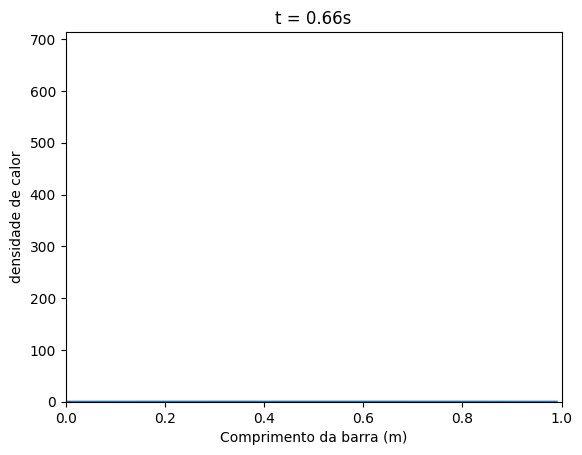

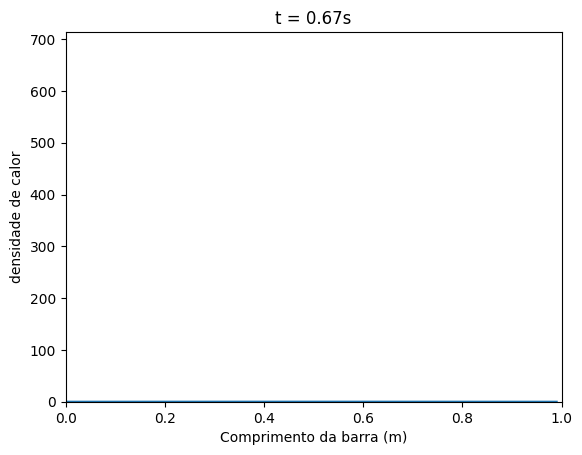

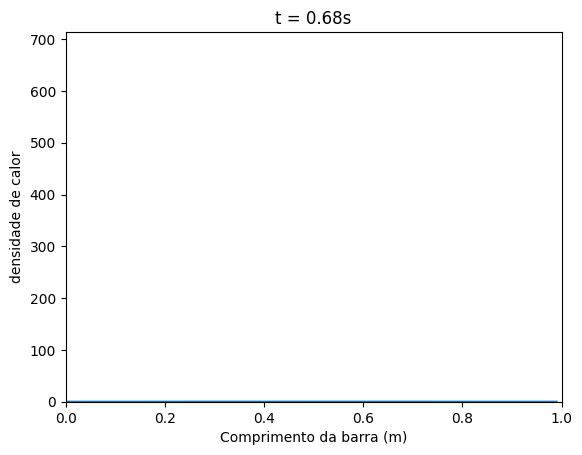

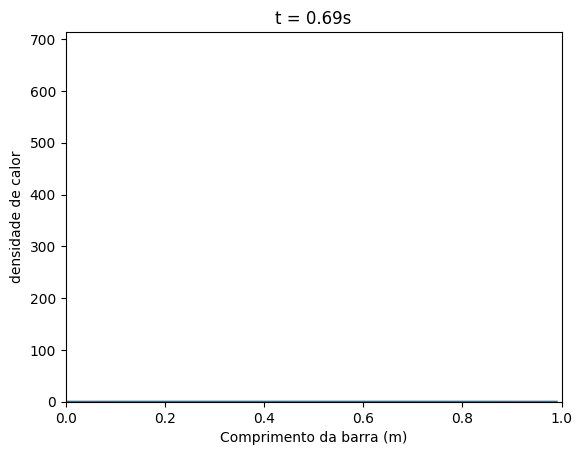

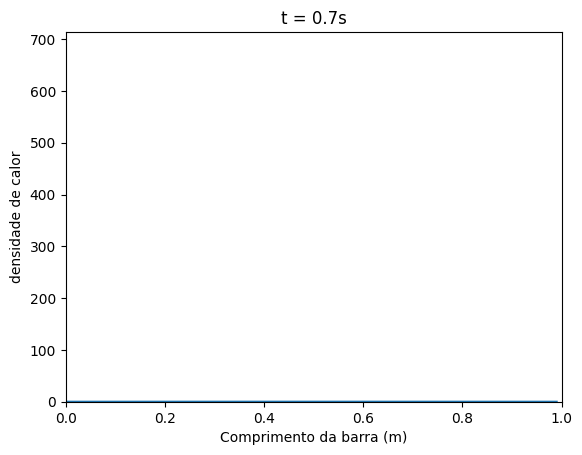

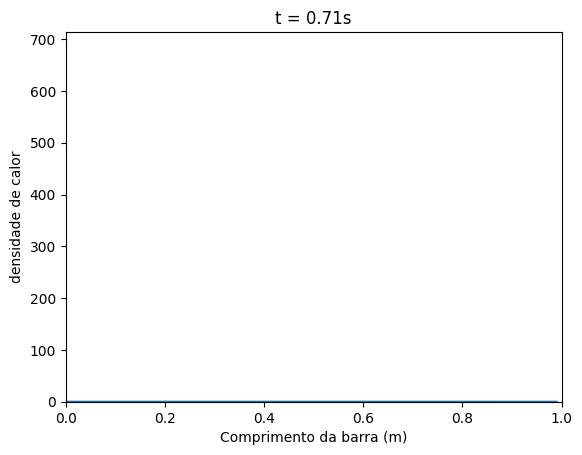

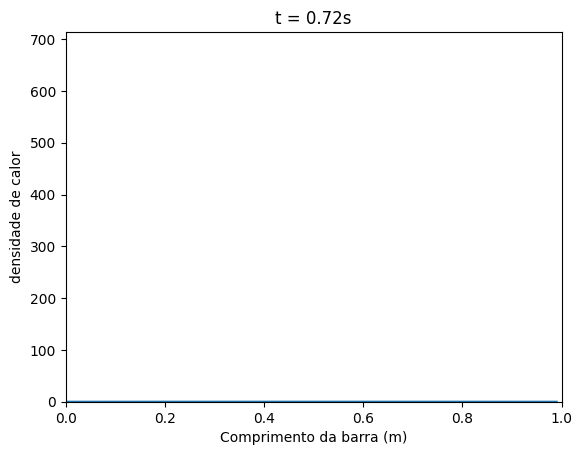

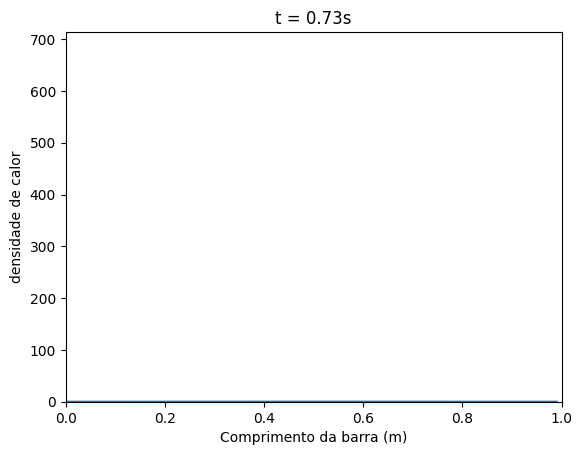

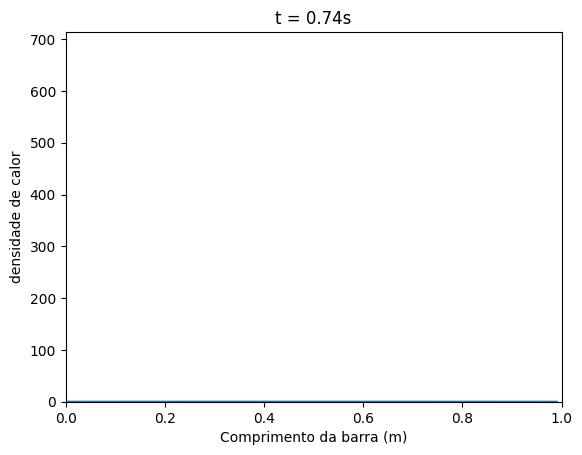

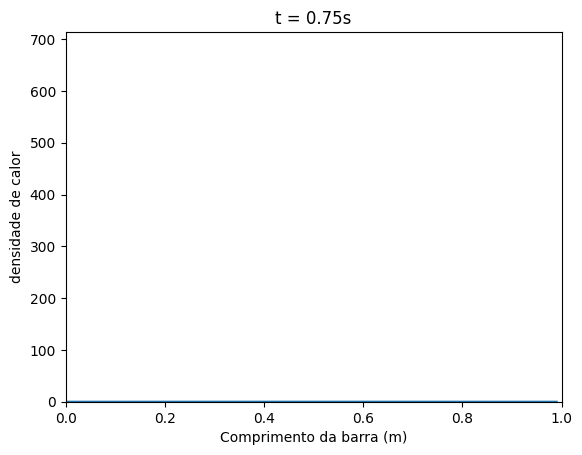

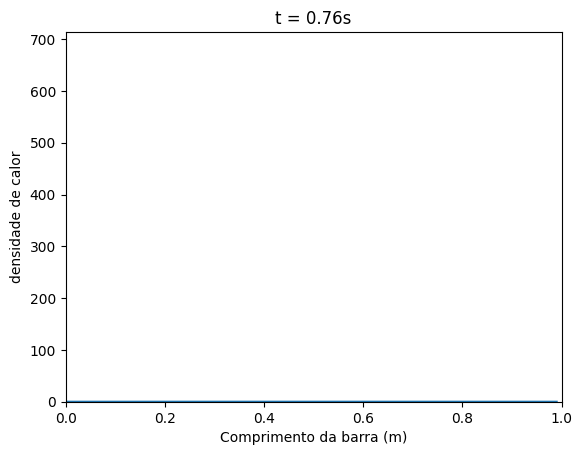

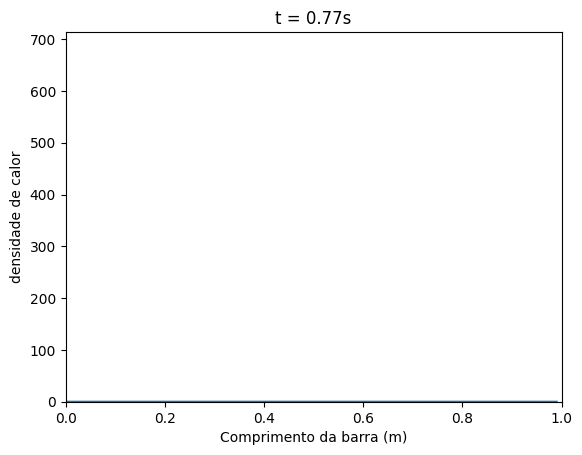

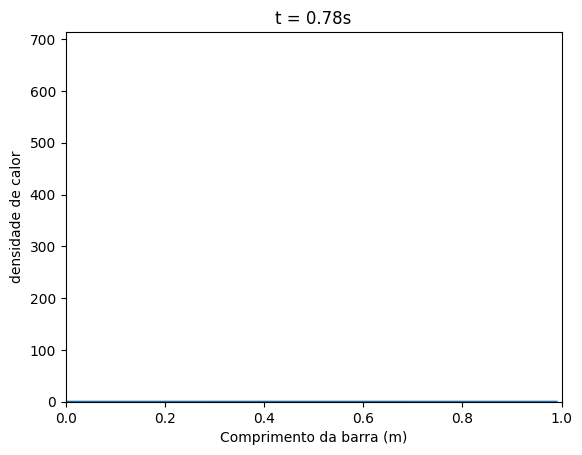

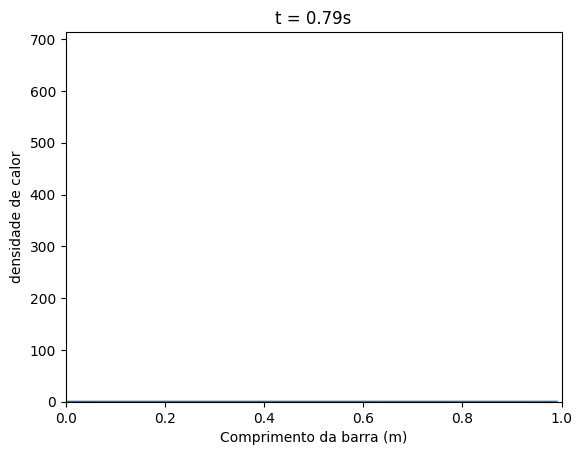

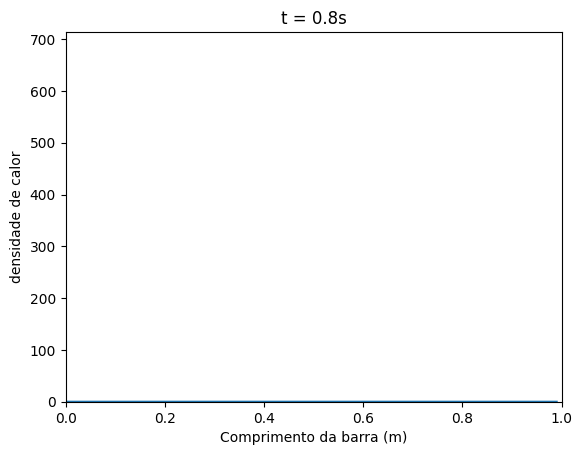

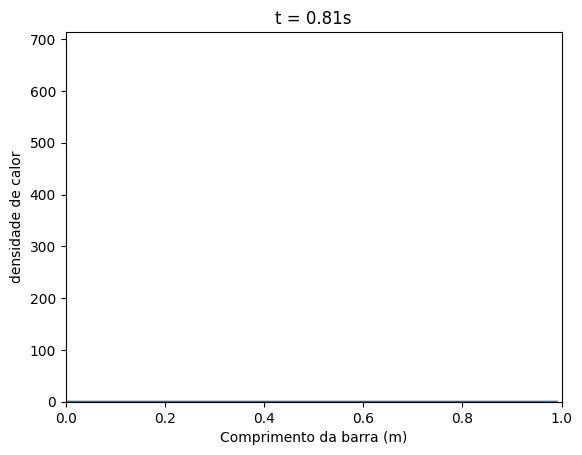

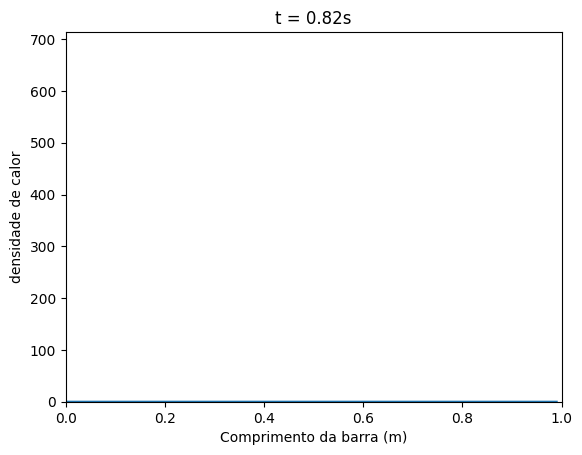

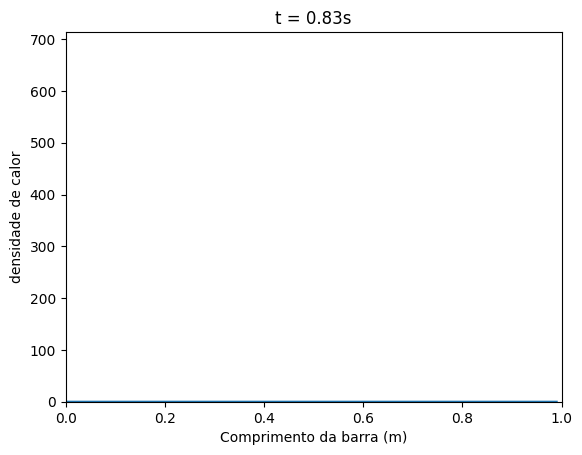

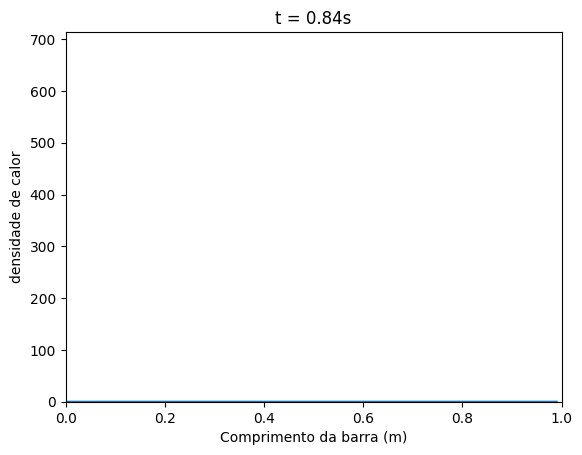

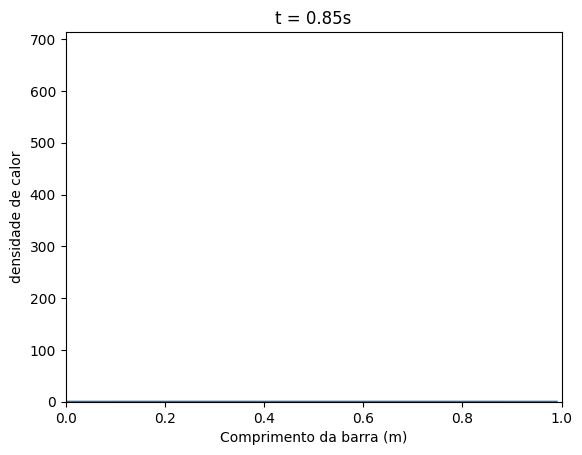

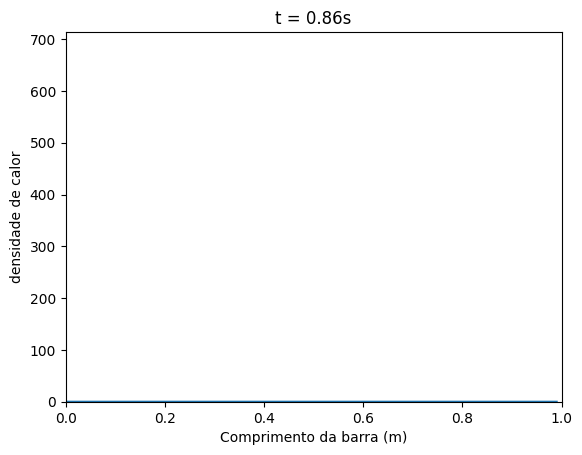

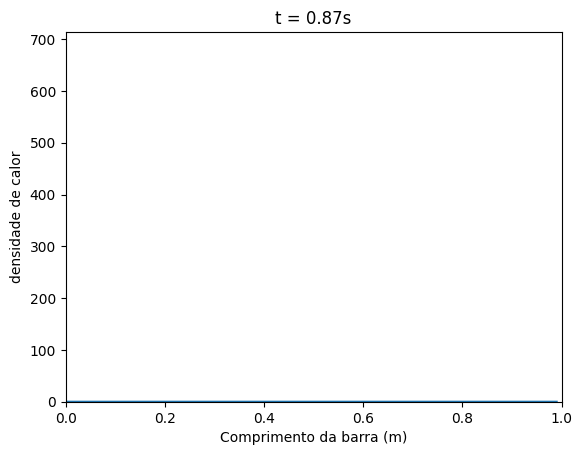

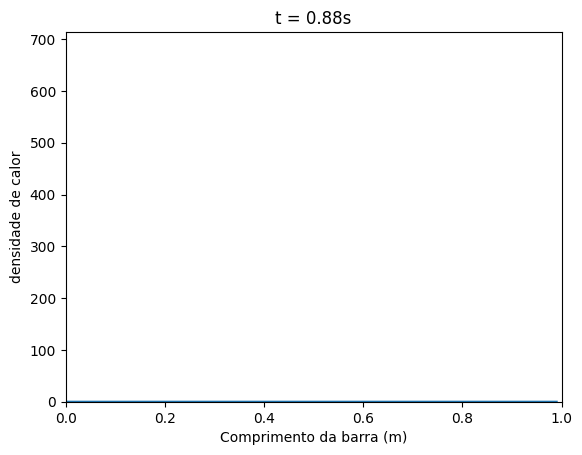

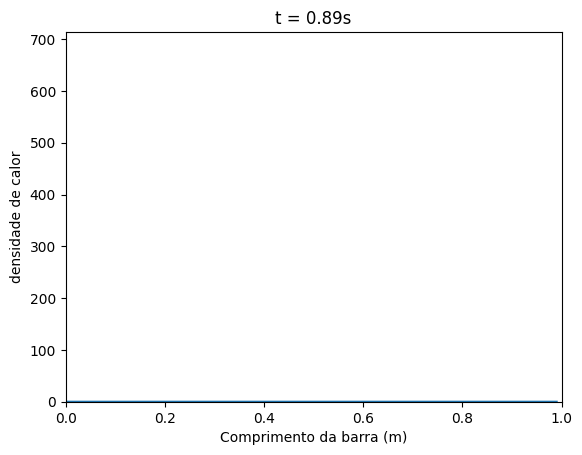

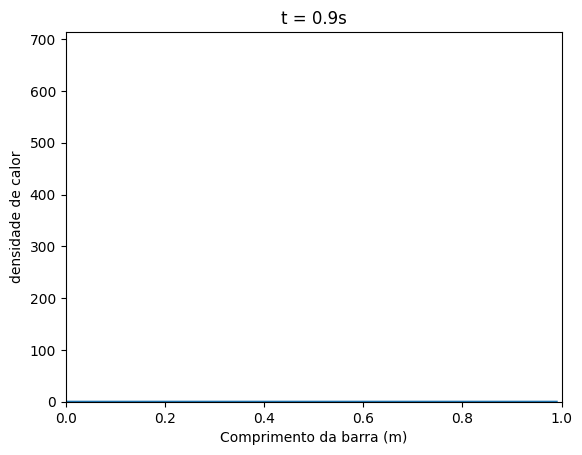

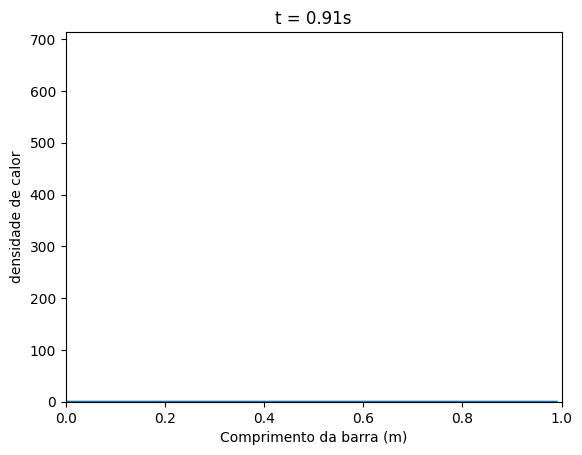

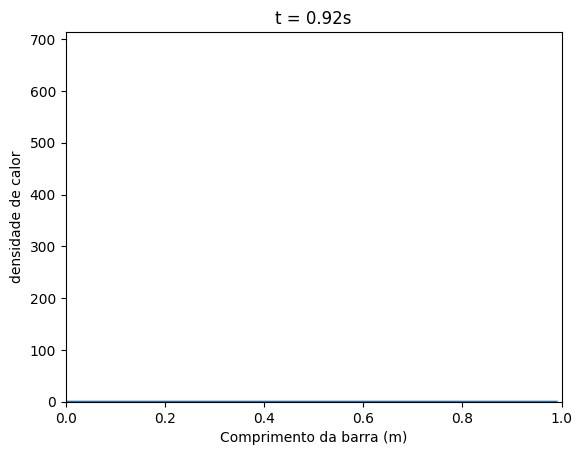

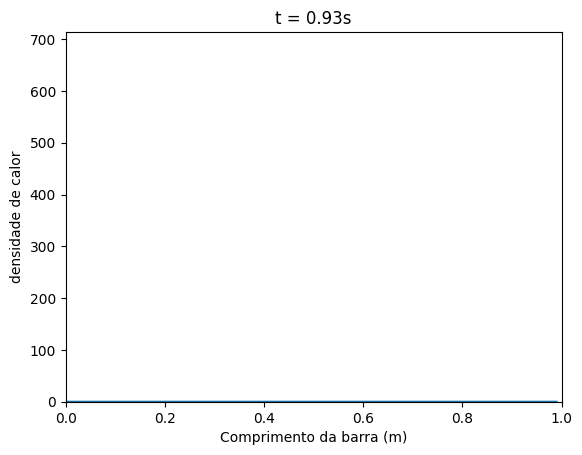

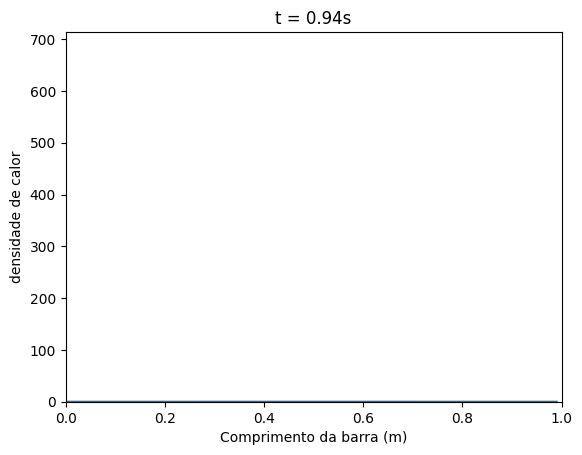

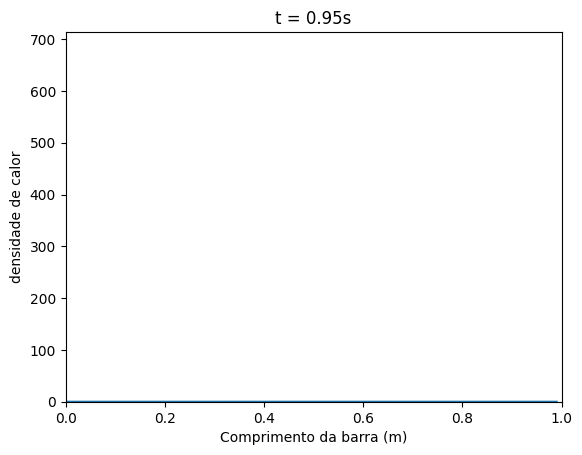

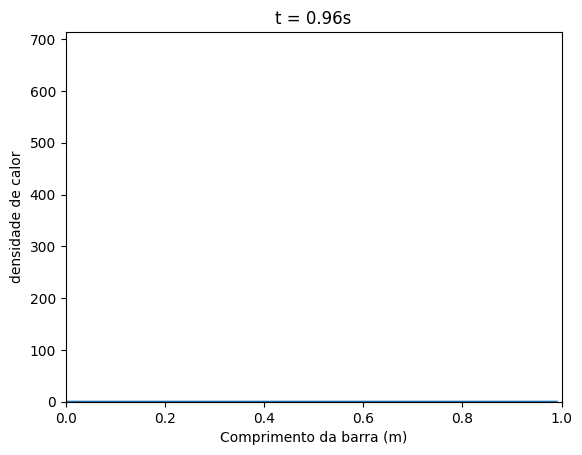

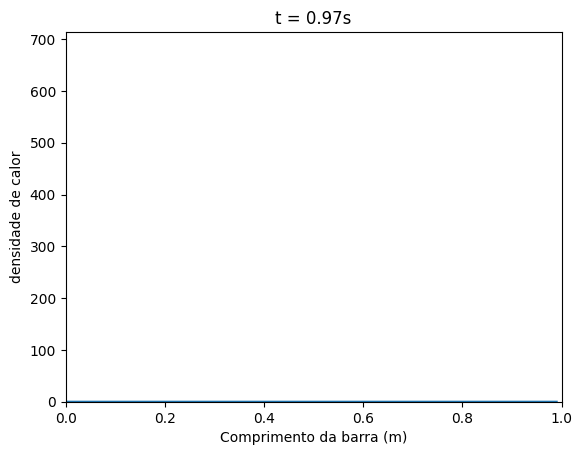

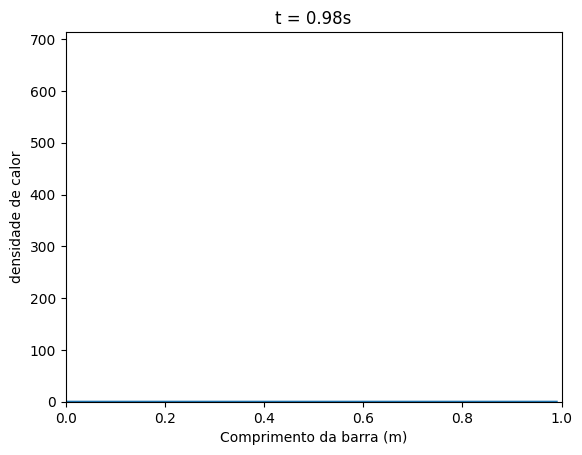

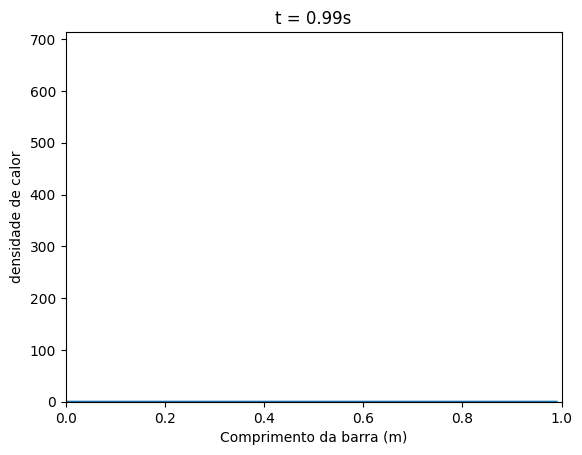

In [12]:
incremento = u.shape[0]/100


for i in range(0,u.shape[0],int(np.floor(incremento))):

    plt.plot(xx,u[i,:])
    plt.xlabel('Comprimento da barra (m)')
    plt.ylabel("densidade de calor")
    plt.title(f't = {round(i*Δt,2)}s')
    plt.ylim(0,np.max(u))
    plt.xlim(0,L)
    plt.show()

In [ ]:
# Tentar fazer a animação